# **LOAD LIBRARY PYTHON**


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# **LOAD DATASET**

kita ubah kolom tangggal menjadi index colom untuk format waktu, agar mudah untuk dimanipulasi

In [ ]:
url = '/content/bps-od_17517_indeks_kesehatan_berdasarkan_kabupatenkota_data.csv'
df = pd.read_csv(url)
df.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,indeks_kesehatan,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,77.43,POIN,2010
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,76.10,POIN,2010
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,75.02,POIN,2010
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,81.44,POIN,2010
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,77.44,POIN,2010


In [ ]:
url = '/content/bps-od_17517_indeks_kesehatan_berdasarkan_kabupatenkota_data.csv'
df_model = pd.read_csv(url, usecols=['nama_kabupaten_kota','indeks_kesehatan','tahun'])
df_model.head()

,nama_kabupaten_kota,indeks_kesehatan,tahun
0,KABUPATEN BOGOR,77.43,2010
1,KABUPATEN SUKABUMI,76.10,2010
2,KABUPATEN CIANJUR,75.02,2010
3,KABUPATEN BANDUNG,81.44,2010
4,KABUPATEN GARUT,77.44,2010


# **DATA EXPLORING**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


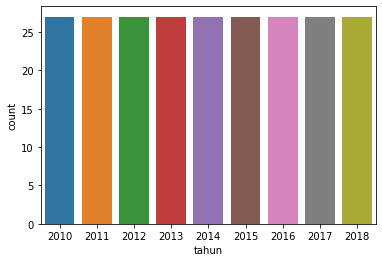

In [ ]:
#melihat univariate kolom tahun

sns.countplot(df.tahun)
plt.show()

In [ ]:
#mengelompokan dataset berdasarkan tanggal dan wilayah kota membuat multiple line chart
plt.clf()
df.groupby('tahun')['indeks_kesehatan'].unstack().plot()
plt.title('Jumlah Vaksin Harian', loc='center', pad=30, fontsize=20,color='black')
plt.xlabel('Tahun', fontsize=15)
plt.ylabel('Index kesehatan', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.legend(loc='best', bbox_to_anchor=(0.5, -0.5), shadow=True, ncol=3,title='Wilayah Kota', fontsize=9, title_fontsize=11)
plt.gcf().set_size_inches(10,5)
plt.tight_layout()
plt.show()

In [ ]:
#df baru bernama df_pekan4, yang menunjukan jumlah vaksin
# di minggu ke 4

df_jaktim_pekan4 = df[(df['wilayah_kota'] == 'JAKARTA TIMUR') & (df.index >= '2021-07-24')]

df_jaktim_pekan4.head()

,wilayah_kota,kecamatan,kelurahan,dosis,jumlah_vaksin
tanggal,,,,,
2021-07-24,JAKARTA TIMUR,KRAMAT JATI,BALE KAMBANG,Dosis 1,157
2021-07-24,JAKARTA TIMUR,JATINEGARA,BALI MESTER,Dosis 1,71
2021-07-24,JAKARTA TIMUR,CIPAYUNG,BAMBU APUS,Dosis 1,116
2021-07-24,JAKARTA TIMUR,PASAR REBO,BARU,Dosis 1,109
2021-07-24,JAKARTA TIMUR,KRAMAT JATI,BATU AMPAR,Dosis 1,304


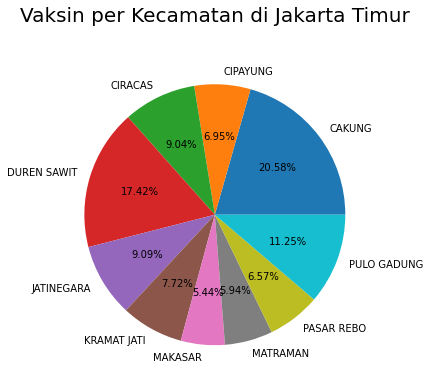

In [ ]:
vaksin_jaktim_per_kecamatan = df_jaktim_pekan4.groupby('kecamatan')['jumlah_vaksin'].sum().reset_index()
plt.figure(figsize=(6,6))
plt.pie(vaksin_jaktim_per_kecamatan['jumlah_vaksin'], labels = vaksin_jaktim_per_kecamatan['kecamatan'], autopct='%1.2f%%')
plt.title('Vaksin per Kecamatan di Jakarta Timur', loc='center', pad = 30, fontsize=20, color='black')
plt.show()

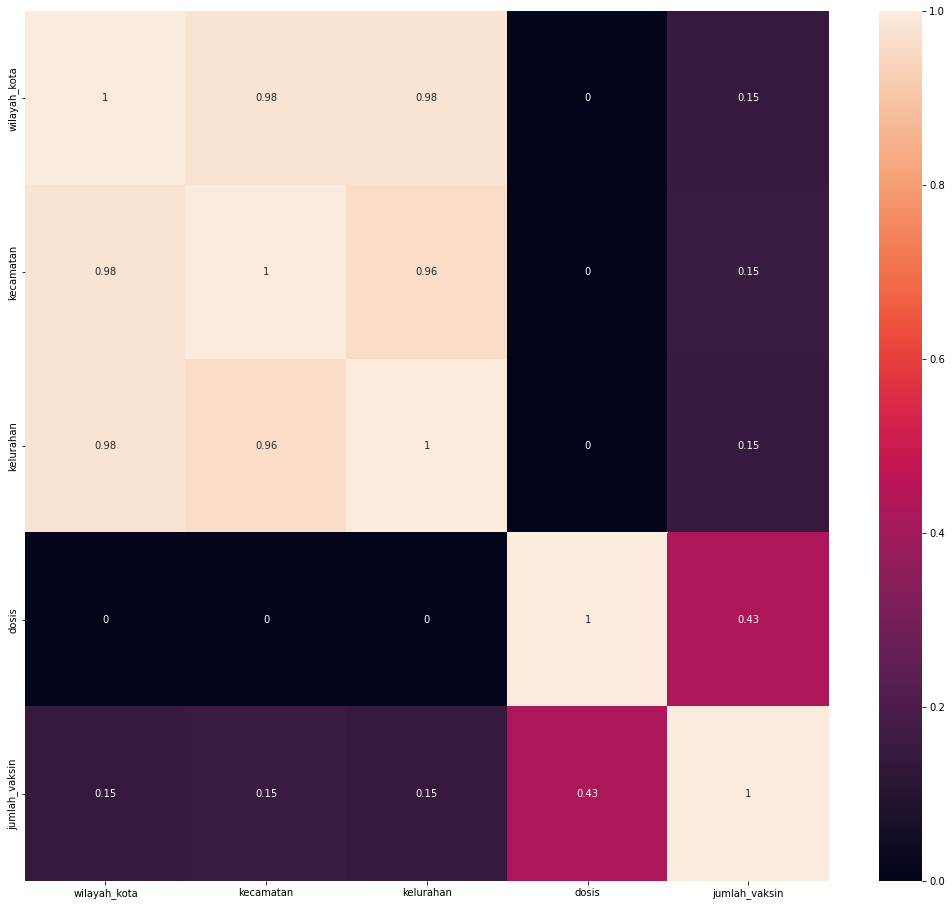

In [ ]:
#Mengetahui nilai korelasi dari independent variable dan dependent variable.
plt.figure(figsize=(18,16))
sns.heatmap(df_copy.corr(method='spearman').abs(), annot=True)